# Generated ranfigs EDA

In [23]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Load data

In [4]:
RANDFIGS_PATH = Path("../scanner_randfigs").resolve()
RANDFIGS_FILEPATHS = [p for p in RANDFIGS_PATH.iterdir() if  p.is_file()]

In [12]:
r_cfgs = []
for rcfg_file in RANDFIGS_FILEPATHS:
    with open(rcfg_file, 'r') as f:
        cfg = yaml.safe_load(f)
        cfg["Config"] = rcfg_file.stem
        r_cfgs.append(cfg)

In [15]:
df = pd.DataFrame(r_cfgs)

## Energy resolution

<AxesSubplot: xlabel='energy_resolution', ylabel='Count'>

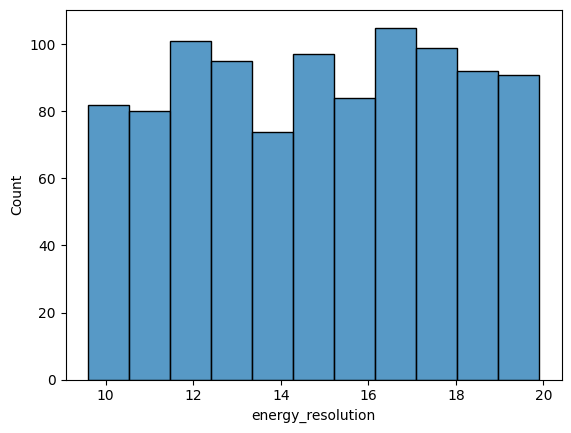

In [18]:
df.pipe(sns.histplot, x="energy_resolution")

Text(515, 200, '511 keV')

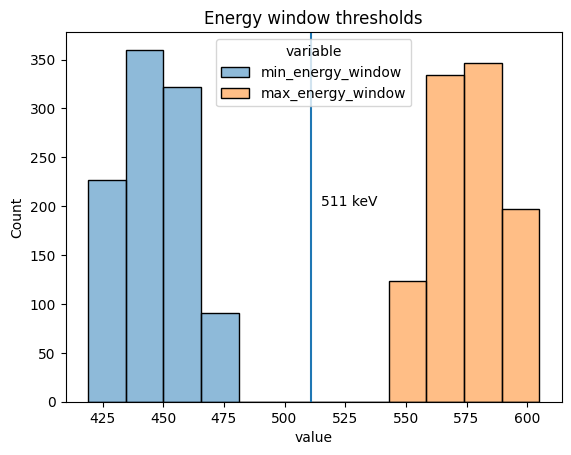

In [30]:
df\
    .pipe(pd.melt, value_vars=["min_energy_window", "max_energy_window"])\
        .pipe(sns.histplot, x="value", hue="variable").set_title("Energy window thresholds")
plt.axvline(511)
plt.text(515, 200, "511 keV")

## Detector size

<AxesSubplot: xlabel='value', ylabel='variable'>

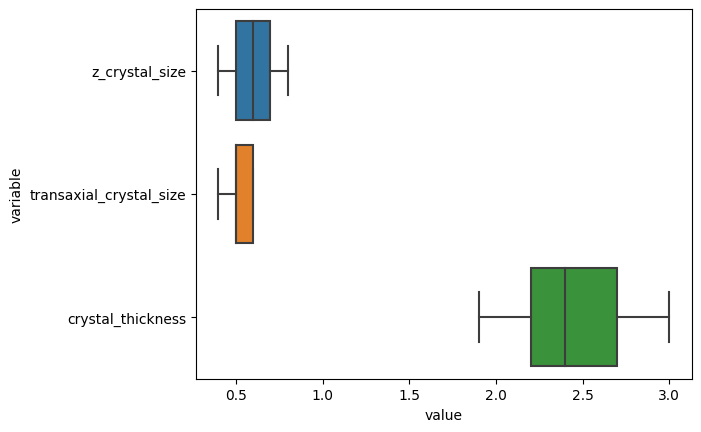

In [34]:
df\
    .pipe(pd.melt, value_vars=["z_crystal_size", "transaxial_crystal_size", "crystal_thickness"])\
        .pipe(sns.boxplot, x="value", y="variable")

## Scanner radius, axial FOV and number of rings

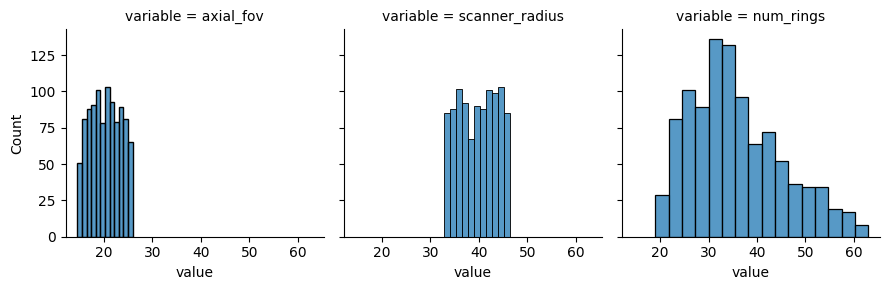

In [38]:
df_ = df.pipe(pd.melt, value_vars=["axial_fov", "scanner_radius", "num_rings"])
g = sns.FacetGrid(df_, col="variable")
g.map_dataframe(sns.histplot, x="value")

## Number of transaxial detectors

<AxesSubplot: xlabel='Transaxial detectors parity', ylabel='count'>

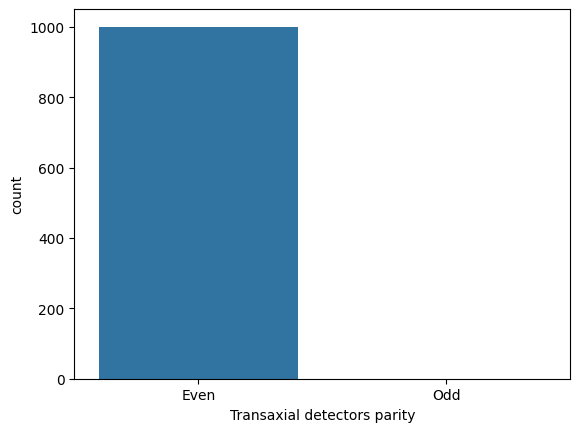

In [48]:
df["Transaxial detectors parity"] = df["n_transaxial_detectors"].apply(lambda n:  "Even" if n % 2 == 0 else "Odd")
df.pipe(sns.countplot, x="Transaxial detectors parity", order=["Even", "Odd"])


<AxesSubplot: xlabel='n_transaxial_detectors', ylabel='Count'>

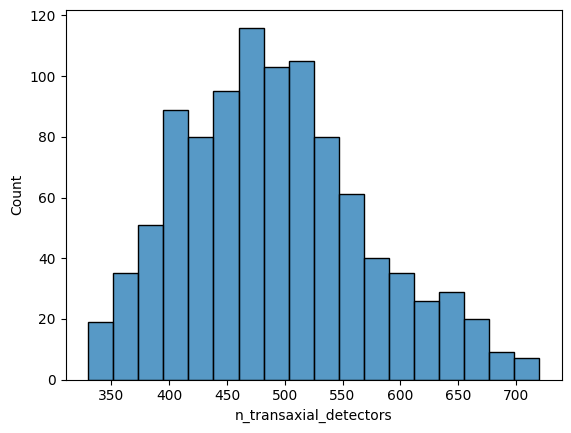

In [49]:
df.pipe(sns.histplot, x="n_transaxial_detectors")